In [70]:
import tsfel 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [71]:
#get raw measurements
def getAccX(df): return df["AccX(g)"]
def getAccY(df): return df["AccY(g)"]
def getAccZ(df): return df["AccZ(g)"]
def getAsX(df): return df["AsX(°/s)"]
def getAsY(df): return df["AsY(°/s)"]
def getAsZ(df): return df["AsZ(°/s)"]
#def getAngleX(df): return df["AngleX(°)"]
#def getAngleY(df): return df["AngleY(°)"]
#def getAngleZ(df): return df["AngleZ(°)"]

def mag(df):
  try:
    return(np.sqrt(df["AccX(g)"] **2  + df["AccY(g)"] **2  + df["AccZ(g)"] ** 2))
  except:
    return(np.sqrt(df["Acceleration X(g)"] **2  + df["Acceleration Y(g)"] **2  + df["Acceleration Z(g)"] ** 2))

def enmo(x):
  return mag(x) - 1
    
def min_max_normalization(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    return (arr - arr_min) / (arr_max - arr_min)


In [72]:
norm = []
bk = []
cfg = tsfel.get_features_by_domain()
files = ["data_me.txt","data_two.txt"]
for f in file:
    with open(f, "r") as data:
        f = data.readlines()
        for file in f: 
            comp = file.split("_")
            if f.index(file) != len(f)-1 and file.endswith(".csv\n"):
                if comp[2] == "bk":
                    bk.append("data/"+(file[:-1]))
                else:
                    norm.append("data/"+(file[:-1]))
            elif file.endswith(".csv"): 
                if comp[2] == "bk":
                    bk.append("data/"+(file))
                else:
                    norm.append("data/"+(file))
    matrix_n = []
    matrix_b = []
    titles = []
    
    for n in norm:
        df = pd.read_csv(n)
        data = enmo(df)
        features = tsfel.time_series_features_extractor(cfg, data, fs=98)
        cal = features.values
        matrix_n.append(cal)
        titles.extend(features.columns)
        
    mat_n = np.vstack(matrix_n)
    diff_mat_n = np.diff(mat_n, axis = 0)
    avg_n = []

    for i in range(diff_mat_n.shape[1]):
        a = np.std(min_max_normalization(mat_n[:,i]))
        avg_n.append(a)

    arr_t = np.array(t)
    avg_n = np.array(avg_n)
    arranged =  np.sort(avg_n, kind="mergesort")
    real_feat = []
    comp_fact_n = []
    for a in arranged[:20]:
        real_feat.append(arr_t[np.where(avg_n == a)[0][0]])
        comp_fact_n.append(avg_n[np.where(avg_n ==a)[0][0]])
    print(real_feat)
    print(comp_fact_n)
    plt.scatter(real_feat, comp_fact_n)
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.rcParams.update({'font.size': 5})
    plt.xticks(rotation=270)
    plt.title('Scatter Plot')
    plt.legend()
    plt.show()




'\nfor b in bk:\n    df = pd.read_csv(b)\n    data = enmo(df)\n    features = tsfel.time_series_features_extractor(cfg, data, fs=98)\n    cal = features.values\n    matrix_b.append(cal)\n   \nmat_b = np.vstack(matrix_b)\navg_b = []\n'

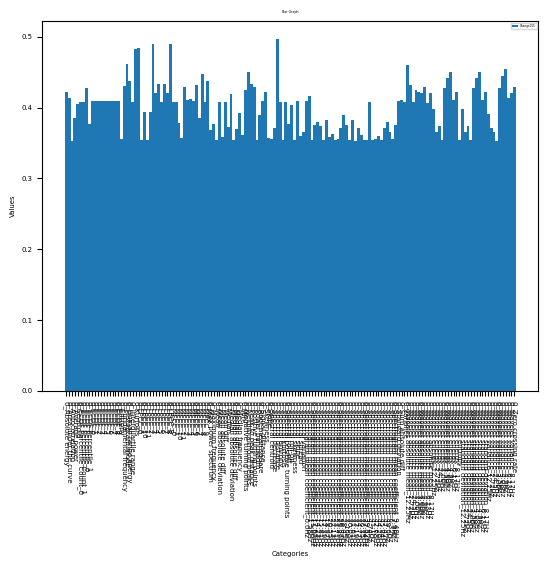

In [73]:
t = titles[:156]
plt.bar(t, avg_n, width=1, label = f"Change{i}")
plt.xlabel('Categories')
plt.ylabel('Values')
plt.rcParams.update({'font.size': 2})
plt.xticks(rotation=270)
plt.title('Bar Graph')
plt.legend()
plt.show()


['0_Autocorrelation', '0_Wavelet variance_3.06Hz', '0_Spectrogram mean coefficient_33.19Hz', '0_Power bandwidth', '0_Spectrogram mean coefficient_45.84Hz', '0_Mean', '0_Median absolute diff', '0_Spectrogram mean coefficient_39.52Hz', '0_Spectrogram mean coefficient_17.39Hz', '0_LPCC_1', '0_LPCC_11', '0_Spectrogram mean coefficient_30.03Hz', '0_Wavelet energy_3.06Hz', '0_Wavelet standard deviation_3.06Hz', '0_Spectrogram mean coefficient_37.94Hz', '0_Spectrogram mean coefficient_11.06Hz', '0_Wavelet entropy', '0_Spectrogram mean coefficient_41.1Hz', '0_Spectral kurtosis', '0_Spectrogram mean coefficient_23.71Hz']
[0.3535533905932738, 0.3535533945750826, 0.3535653683988803, 0.3536226455219127, 0.3536324689902089, 0.35382720598969003, 0.3538390859546486, 0.3539118348659263, 0.3539124347194421, 0.35392121097923973, 0.3539212109792398, 0.3539594634354183, 0.3540068107738142, 0.3540068750311048, 0.35417636257340823, 0.3542092560064105, 0.3542701384184498, 0.3543188145985401, 0.35432888892838

/var/folders/3m/pkbjl2xd32x5jfm99g385c1m0000gn/T/ipykernel_64236/245393870.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


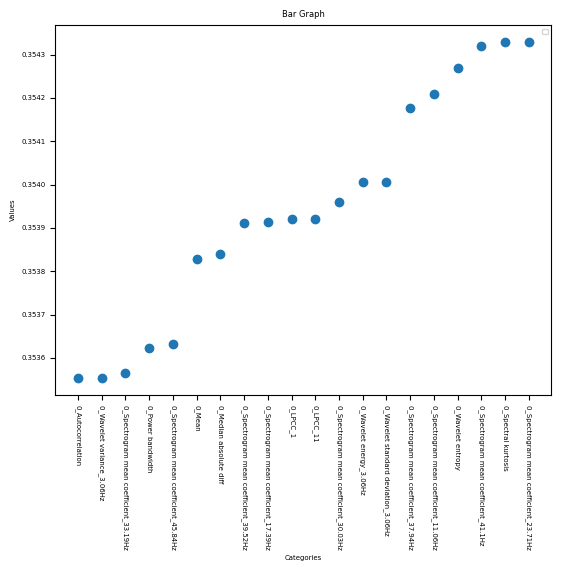

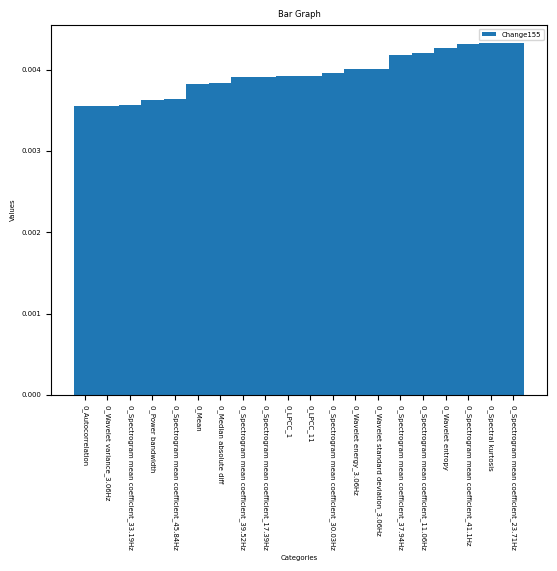

In [69]:
b = np.array(comp_fact_n) - 0.35
plt.bar(real_feat, b, width=1, label = f"Change{i}")
plt.xlabel('Categories')
plt.ylabel('Values')
plt.rcParams.update({'font.size': 5})
plt.xticks(rotation=270)
plt.title('Bar Graph')
plt.legend()
plt.show()
